<a href="https://colab.research.google.com/github/shahadatrucse/Machine-Learning/blob/main/LabWork_2_HandwrittenDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import necessary Library**

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.datasets import mnist
from tensorflow.keras.models import Model
import tensorflow as tf
from keras.models import Sequential
import numpy as np

# **Import Mnist Dataset and Dataset Processing**

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

## **Show images sample**



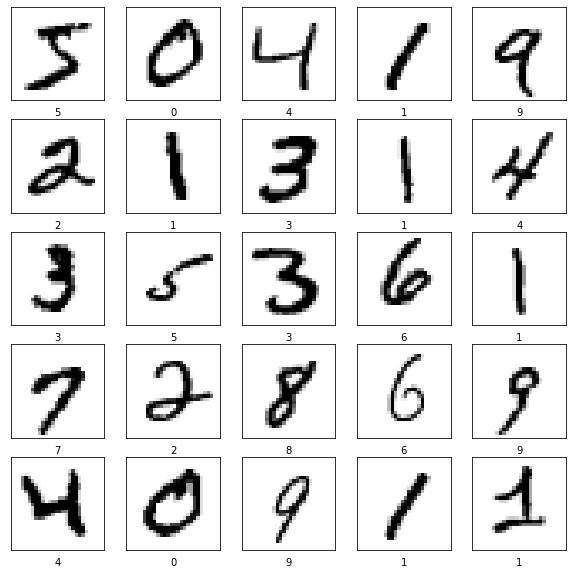

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i], cmap=plt.cm.binary)
    plt.xlabel(train_y[i])
plt.show()



**Check size and shape of the dataset**

In [ ]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


# **Design Network Layer**

In [ ]:
# Define the model architecture
model1 = Sequential()
model1.add(Dense(128, input_shape=(28, 28),activation='relu'))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 28, 128)           3712      
                                                                 
 flatten_8 (Flatten)         (None, 3584)              0         
                                                                 
 dense_33 (Dense)            (None, 64)                229440    
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 10)                330       
                                                                 
Total params: 235,562
Trainable params: 235,562
Non-trainable params: 0
_________________________________________________________________


## **Training Model**

In [ ]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.fit(train_X, train_y, epochs=10, batch_size=32,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7697 - accuracy: 0.8719
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2145 - accuracy: 0.9394
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1645 - accuracy: 0.9527
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1378 - accuracy: 0.9591
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1198 - accuracy: 0.9639
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1078 - accuracy: 0.9675
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0911 - accuracy: 0.9722
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0838 - accuracy: 0.9739
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0777 - accuracy: 0.9765
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.070

# **Model Evaluation**

In [ ]:
accuracy=model1.evaluate(test_X,test_y)

313/313 [==============================] - 2s 4ms/step - loss: 0.1618 - accuracy: 0.9609


In [ ]:
print("Model Accuracy = {:.2f}%".format(round(accuracy[1]*100, 2)))

Model Accuracy = 96.09%


# **Model Testing**

In [ ]:
predicted = model1.predict(test_X)

313/313 [==============================] - 1s 4ms/step


In [ ]:
print(predicted[0]*100)

[2.9267575e-09 6.4689887e-10 1.3240805e+00 1.9563425e-03 3.0628073e-09
 2.8597116e-09 5.6451257e-11 9.8673965e+01 8.4200504e-09 4.2619939e-11]


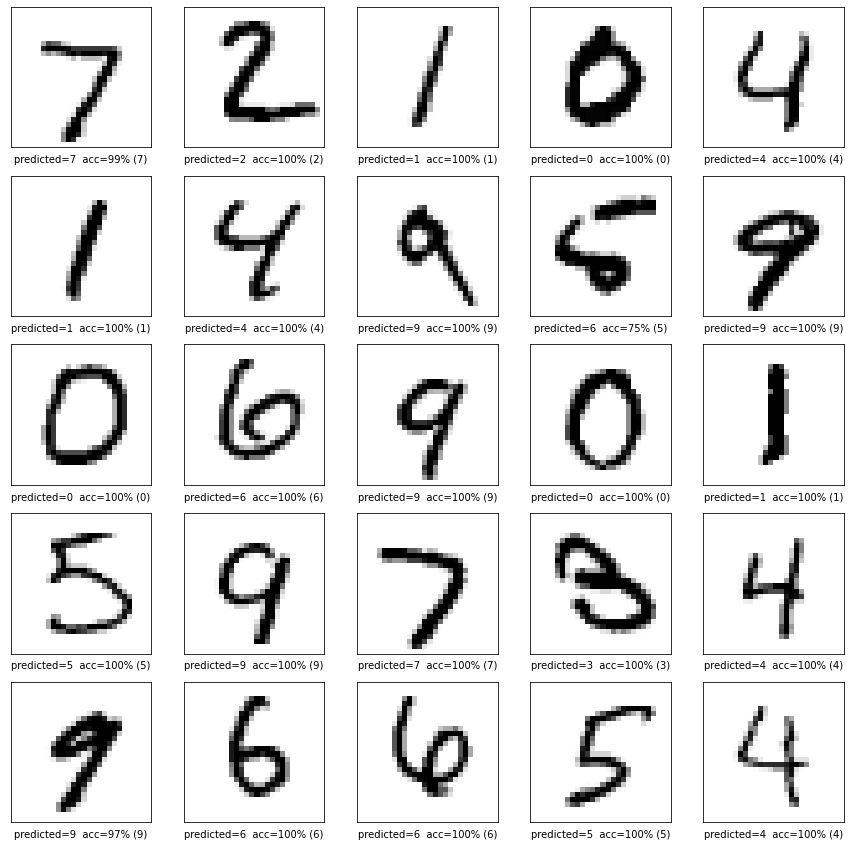

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
  
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_X[i], cmap=plt.cm.binary)
    plt.xlabel("real="+str(test_y[i])+", "+"predicted="+str(np.argmax(predicted[i])))
    
    color = 'blue'
    if np.argmax(predicted[i]) != test_y[i]:
      color = 'red'

    plt.xlabel("{} acc={:2.0f}% ({})".format("predicted="+str(np.argmax(predicted[i]))+" ",
                                100*np.max(predicted[i]),
                                str(test_y[i]),
                                color=color))

plt.show()



# **Training Model Using Augmentation Dataet**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

x_train = train_X.reshape(-1,28,28,1)
x_test = test_X.reshape(-1,28,28,1)

datagen = ImageDataGenerator(
      rotation_range=1,
      width_shift_range=0.1,
      height_shift_range=0.1,
      zoom_range=0.1,
      shear_range=0.1
    )

test_datagen = ImageDataGenerator(
      rotation_range=1,
      width_shift_range=0.1,
      height_shift_range=0.1,
      zoom_range=0.1,
      shear_range=0.1
    )

datagen.fit(x_train)
test_datagen.fit(x_test)
print(x_train.shape)
train_generator = datagen.flow(x_train, train_y, batch_size=32)
test_generator = test_datagen.flow(x_test,test_y, batch_size=32)


(60000, 28, 28, 1)


# **Augmentation Data Visualization**

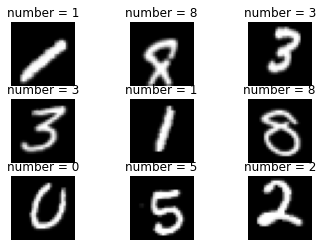

In [ ]:
for X_batch, y_batch in train_generator:
    for i in range(0,9):
        plt.subplot(330 + 1 + i)
        plt.axis('off')
        plt.imshow(X_batch[i][:,:,0], cmap='gray')
        plt.title('number = ' + str(y_batch[i]))
    break

# **Model Architecture**

In [ ]:
# Define the model architecture
model2 = Sequential()
model2.add(Dense(128, input_shape=(28, 28,1),activation='relu'))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 28, 28, 128)       256       
                                                                 
 flatten_10 (Flatten)        (None, 100352)            0         
                                                                 
 dense_41 (Dense)            (None, 64)                6422592   
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 10)                330       
                                                                 
Total params: 6,425,258
Trainable params: 6,425,258
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(train_generator,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 3.3221 - accuracy: 0.4263
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 1.1777 - accuracy: 0.6113
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.9189 - accuracy: 0.7070
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.7745 - accuracy: 0.7524
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7023 - accuracy: 0.7772
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6382 - accuracy: 0.7991
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.5910 - accuracy: 0.8128
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5464 - accuracy: 0.8279
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4930 - accuracy: 0.8438
Epoch 10/10
1875/1875 [==============================] - 23s 12m

## **Model Testing**

In [ ]:
d=model2.evaluate(test_generator)
print("Model Accuracy = {:.2f}%".format(round(d[1]*100, 2)))

313/313 [==============================] - 1s 3ms/step - loss: 0.2714 - accuracy: 0.9167
Model Accuracy = 91.67%


In [ ]:
predicted = model2.predict(test_X)

313/313 [==============================] - 1s 2ms/step


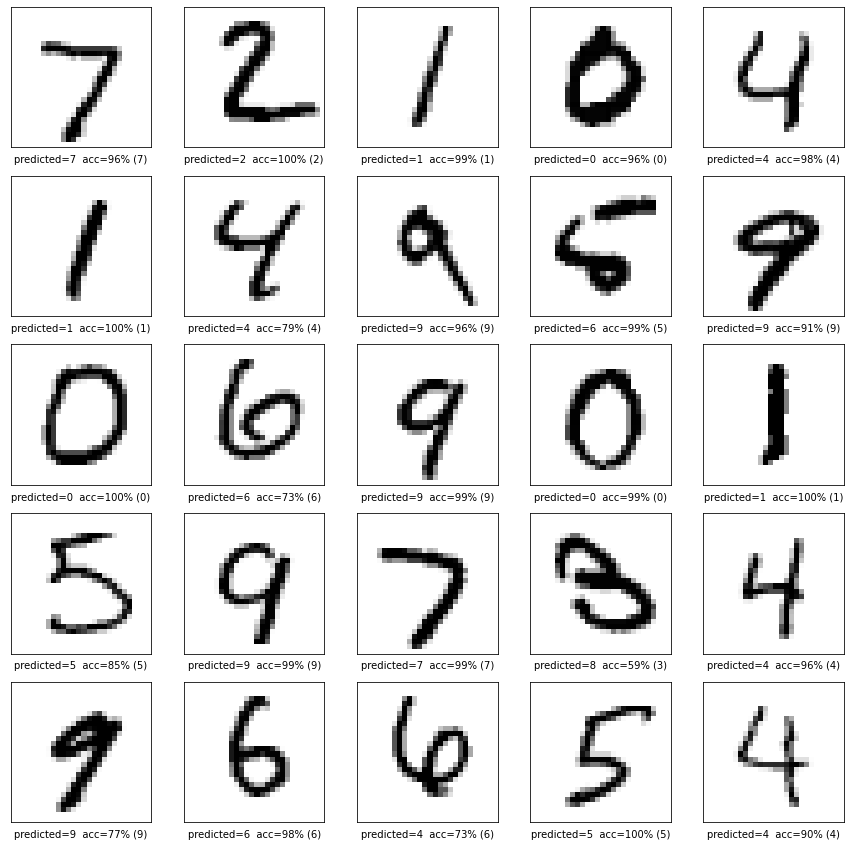

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
  
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_X[i], cmap=plt.cm.binary)
    plt.xlabel("real="+str(test_y[i])+", "+"predicted="+str(np.argmax(predicted[i])))
    
    color = 'blue'
    if np.argmax(predicted[i]) != test_y[i]:
      color = 'red'

    plt.xlabel("{} acc={:2.0f}% ({})".format("predicted="+str(np.argmax(predicted[i]))+" ",
                                100*np.max(predicted[i]),
                                str(test_y[i]),
                                color=color))

plt.show()



In [ ]:
# acc = model1.evaluate_generator(test_generator)
score = model1.evaluate(test_generator)


313/313 [==============================] - 53s 16ms/step - loss: 0.4091 - accuracy: 0.8741


In [ ]:
print("Model Accuracy without augmentation= {:.2f}%".format(round(score[1]*100, 2)))

Model Accuracy without augmentation= 87.41%
